In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='InvertedDoublePendulum-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(231506, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(227061, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,25-07-2023 16:18:34,9,0,9,0.000447,1,10,True,82.507769,82.507769,82.507769,82.507769,82.507769,COMCACT
1,1,2,InvertedDoublePendulum-v4,25-07-2023 16:18:35,10,0,10,0.000497,1,11,True,90.900910,86.704340,86.704340,86.704340,86.704340,COMCACT
2,1,3,InvertedDoublePendulum-v4,25-07-2023 16:18:35,11,0,11,0.000547,1,12,True,99.042960,90.817213,90.817213,90.817213,90.817213,COMCACT
3,1,4,InvertedDoublePendulum-v4,25-07-2023 16:18:36,12,0,12,0.000596,1,13,True,106.820898,94.818134,94.818134,94.818134,94.818134,COMCACT
4,1,5,InvertedDoublePendulum-v4,25-07-2023 16:18:37,13,0,13,0.000646,1,14,True,113.872640,98.629035,98.629035,98.629035,98.629035,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,16-07-2023 13:31:41,8,9,0,0.000398,1,9,True,73.196828,73.196828,73.196828,73.196828,73.196828,DDPG
1,1,2,InvertedDoublePendulum-v4,16-07-2023 13:31:41,9,10,0,0.000447,1,10,True,81.639682,77.418255,77.418255,77.418255,77.418255,DDPG
2,1,3,InvertedDoublePendulum-v4,16-07-2023 13:31:41,10,11,0,0.000497,1,11,True,89.744908,81.527139,81.527139,81.527139,81.527139,DDPG
3,1,4,InvertedDoublePendulum-v4,16-07-2023 13:31:41,11,12,0,0.000547,1,12,True,97.304528,85.471486,85.471486,85.471486,85.471486,DDPG
4,1,5,InvertedDoublePendulum-v4,16-07-2023 13:31:41,12,13,0,0.000596,1,13,True,103.770579,89.131305,89.131305,89.131305,89.131305,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedDoublePendulum-v4,25-07-2023 16:18:34,9,0,9,0.000447,1,10,True,82.507769,82.507769,82.507769,82.507769,82.507769,COMCACT
1,1,2,InvertedDoublePendulum-v4,25-07-2023 16:18:35,10,0,10,0.000497,1,11,True,90.900910,86.704340,86.704340,86.704340,86.704340,COMCACT
2,1,3,InvertedDoublePendulum-v4,25-07-2023 16:18:35,11,0,11,0.000547,1,12,True,99.042960,90.817213,90.817213,90.817213,90.817213,COMCACT
3,1,4,InvertedDoublePendulum-v4,25-07-2023 16:18:36,12,0,12,0.000596,1,13,True,106.820898,94.818134,94.818134,94.818134,94.818134,COMCACT
4,1,5,InvertedDoublePendulum-v4,25-07-2023 16:18:37,13,0,13,0.000646,1,14,True,113.872640,98.629035,98.629035,98.629035,98.629035,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
45046,5,45047,InvertedDoublePendulum-v4,16-07-2023 20:48:05,49996,49997,0,0.999,50,997,True,5178.828172,2345.200800,5030.502707,5141.763951,5183.370707,DDPG
45047,5,45048,InvertedDoublePendulum-v4,16-07-2023 20:48:05,49997,49998,0,0.999,50,998,True,5181.974292,2345.263772,5034.463822,5144.162511,5183.475687,DDPG
45048,5,45049,InvertedDoublePendulum-v4,16-07-2023 20:48:05,49998,49999,0,0.999,50,999,True,5186.971433,2345.326852,5038.410103,5146.670539,5183.412166,DDPG
45049,5,45050,InvertedDoublePendulum-v4,16-07-2023 20:48:05,49999,50000,0,0.999,50,1000,True,5183.483071,2345.389852,5042.265555,5149.035038,5183.652840,DDPG
45050,5,45051,InvertedDoublePendulum-v4,16-07-2023 20:48:05,50000,50001,0,0.999,50,1001,True,5182.169245,2345.452821,5046.057909,5151.293749,5183.704715,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-07-2023 18:26:52,InvertedDoublePendulum-v4,5000,22.909732,COMCACT
1,1,25-07-2023 20:35:21,InvertedDoublePendulum-v4,10000,41.704175,COMCACT
2,1,25-07-2023 22:44:53,InvertedDoublePendulum-v4,15000,51.234430,COMCACT
3,1,26-07-2023 00:53:45,InvertedDoublePendulum-v4,20000,32.283914,COMCACT
4,1,26-07-2023 03:01:40,InvertedDoublePendulum-v4,25000,46.367033,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,38.022973
std,1.428571,14507.211437,10.368372
min,1.000000,5000.000000,17.966520
25%,2.000000,15000.000000,32.155164
50%,3.000000,27500.000000,41.451650
75%,4.000000,40000.000000,46.262874
max,5.000000,50000.000000,51.411897


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,16-07-2023 13:39:14,InvertedDoublePendulum-v4,5000,22.847927,DDPG
1,1,16-07-2023 13:47:03,InvertedDoublePendulum-v4,10000,46.302272,DDPG
2,1,16-07-2023 13:55:07,InvertedDoublePendulum-v4,15000,32.160639,DDPG
3,1,16-07-2023 14:03:24,InvertedDoublePendulum-v4,20000,37.063373,DDPG
4,1,16-07-2023 14:11:58,InvertedDoublePendulum-v4,25000,32.287607,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,44.020660
std,1.428571,14507.211437,7.488826
min,1.000000,5000.000000,22.847927
25%,2.000000,15000.000000,37.015614
50%,3.000000,27500.000000,46.292743
75%,4.000000,40000.000000,51.184073
max,5.000000,50000.000000,51.444877


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

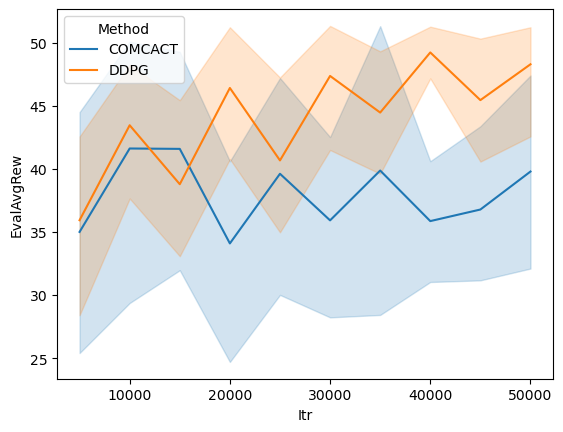

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,112,295.603650,COMCACT,211.526465
100,113,296.185533,COMCACT,213.663243
101,114,298.007101,COMCACT,215.734305
102,115,301.051567,COMCACT,217.754391
103,116,305.189202,COMCACT,219.738074


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,123,732.974050,DDPG,391.077453
100,124,739.437521,DDPG,397.739860
101,125,744.729810,DDPG,404.370761
102,126,747.926048,DDPG,410.952572
103,127,747.573090,DDPG,417.455258


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,112,295.603650,COMCACT,211.526465
100,113,296.185533,COMCACT,213.663243
101,114,298.007101,COMCACT,215.734305
102,115,301.051567,COMCACT,217.754391
103,116,305.189202,COMCACT,219.738074


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
45046,49996,5178.828172,DDPG,5030.502707
45047,49997,5181.974292,DDPG,5034.463822
45048,49998,5186.971433,DDPG,5038.410103
45049,49999,5183.483071,DDPG,5042.265555
45050,50000,5182.169245,DDPG,5046.057909


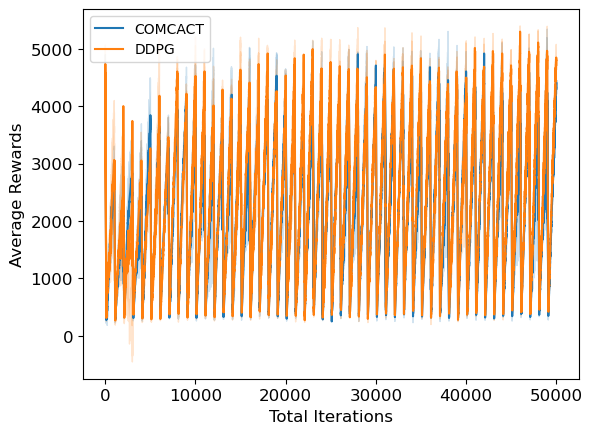

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,41.704175,COMCACT,32.306954
2,15000,51.234430,COMCACT,46.469303
3,20000,32.283914,COMCACT,41.759172
4,25000,46.367033,COMCACT,39.325473
5,30000,46.533085,COMCACT,46.450059


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,46.302272,DDPG,34.575100
2,15000,32.160639,DDPG,39.231455
3,20000,37.063373,DDPG,34.612006
4,25000,32.287607,DDPG,34.675490
5,30000,46.271167,DDPG,39.279387


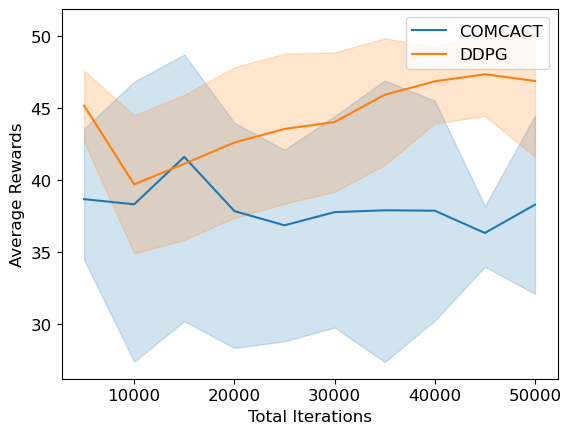

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-EVALUATION.png")

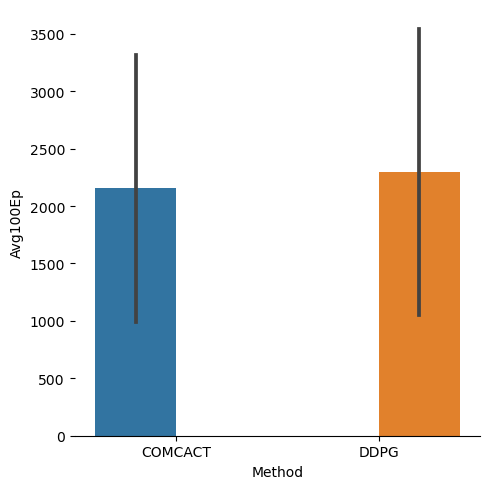

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

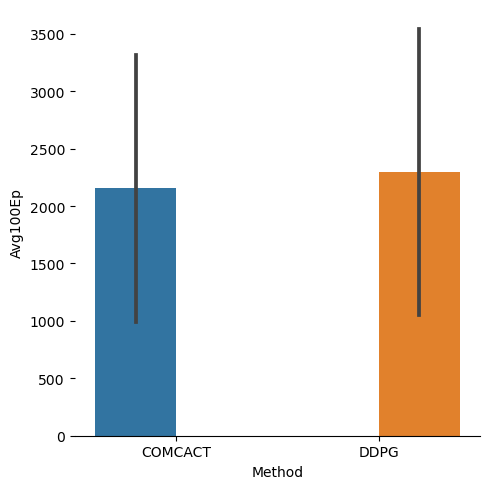

In [24]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)